# K-Nearest Neighbors (KNN)

KNN es una técnica de clasificación, la idea general de KNN es que se tienen datos con labels de la clase a la que pertenecen, una vez se quiere evaluar una nueva muestra para saber a que clase pertenece, se evalua los $k$ vecinos más próximos (la distancia dada por una métrica determinada), se evalua la clase a la que pertenecen esos $k$ vecinos, y por votación de mayoria, se le asigna a esa nueva muestra la clase con mas elementos dentro del grupo.

KNN tiene problemas cuando se tienen muchas variables de entrada, ya que la distancia euclidea no es la más óptima para representar las estructuras de los datos cuando se aumenta la dimensionalidad, esto se conoce como (the curse of dimensionality). Ademas si se tienen bases de datos muy grandes puede ser complejo el uso de este metodo. también la selección de la métrica es importante.

Otro problema se presenta cuando hay empate en el numero de clases de los vecinos, para evitar esto se puede utilizar un valor de $k$ que sea impar. En caso de que se mantenga el empate (que se tengan más de dos clases), entonces se puede asignar la clase de forma aleatoria. En la figura se expresa este proceso.

<img src="img/KNN_1.png" width="400">
Punto asignado a la clase roja

<img src="img/KNN_2.png" width="400">
Punto asignado a la clase verde

<img src="img/KNN_3.png" width="400">
Punto asignado a la clase roja

## Cómo se veria en Python

Ahora implementaremos este clasificador para observar como se ve las regiones de decisión.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

In [6]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

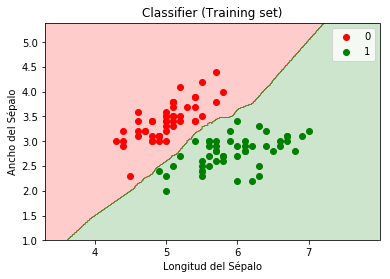

In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend()
plt.show()

# K-Means

K-means es un metodo de clustering (agrupamiento), es decir pertenece a los metodos de aprendizaje **No Supervisado**. Cuando hablamos de aprendizaje no supervisado, nos referimos a qu eno tenemos un conjunto de datos de slaida, o target, solamente contamos con los datos de entrada $\mathbf{x}^{(i)}$, para $i=\{1,m\}$.

**Pregunta:** ¿Para qué pueden servir los métodos no supervisados?

**Solución:** Los métodos de clustering permiten identificar la estrucutuara qu epueden tener los datos. Son muy utilizados en segmentación de mercado, analuisis de productos (camisas), analisis de redes (sociales), segmentacion de clusters de comutadores, astrofisica, entre otras áreas. Una de las ventajas de estos metodos es que nos permite encontrar las relaciones internas entre las variables, sin forzarlas a una estructura ya sea dada por un problema de regresión o un problema de clasificación. 

Es importante recalcar qu eal no haber labels de clases, en los metodos de clustering **NO SE PUEDE HABLAR DE CLASES**, se habla de **GRUPOS** o **CLUSTERS**. A estos clusters en un paso posterios se les puede asignar un label, en ese momento el cluster se convierte en una clase, pero antes son Clusters!!!.

El método de k-means es uno de los metodos mas sencillos para hacer clustering. De forma descriptiva este metodo lo que hace es dividir los datos de entrada en $k$ grupos, esé número de clusters $k$ es una entrada del algoritmo y debemos sleccionarlo nosotros. Cada uno de esos clusters va a estar identificado por el valor medio de los elementos qu ecomponen al cluster, ese valor medio se denomina $\mu_{C^{(i)}}$, donde $C^{(i)}$ se refiere al cluster $i$-ésimo. En si el algortimo trabaja de la siguiente forma:

1. Dado un número de datos de entrada se inicializan los valores de $\mu_{C^{(i)}}$ de forma aleatoria. **Nota:** Otra forma es inicializar lo svvalores de $\mu_{C^{(i)}}$ como $k$ muestras independientes pertenecientes a los datos de entrada.
2. A cada dato de entrada $\mathbf{x}^{(i)}$ se le asigna un grupo el cual esta dado por el $\mu_{C^{(i)}}$ más cercano, la cercania se mide utilizando l adistancia euclidea (También se puede usar otra métrica pero eso alteraria la función de costo qu evamos a ver más adelante)
3. Una vez asignados los clusters, se actualiza $\mu_{C^{(i)}}$ utiliznado la media de los datos pertenencintes a ese cluster:
$$\mu_{C^{(i)}} = \frac{1}{m_{C^{(i)}}}\sum_{\mathbf{x}^{(i)}\in C^{(i)}}\mathbf{x}^{(i)},$$

con $m_{C^{(i)}}$ el número de elementos en el cluster $C^{(i)}$.

4. Se itera hasta que las medias de los clusters converjan.

### Función de Costo para k-means

La función de costo para k-means esta dada por:

$$\mathbf{J}(C^{(1)}, C^{(2)}, \ldots, C^{(k)}, \mu_{C^{(1)}}, \mu_{C^{(1)}}, \ldots, \mu_{C^{(k)}}) = \frac{1}{m}\sum_{j = 1}^{m}||\mathbf{x}^{(j)}-\mu_{C^{(j)}}||^2.$$

Esta función de costo aveces s edenomina la función de distorción.

**Pregunta:** ¿Cómo se minimiza esta función de costo para los clusters $C^{(i)} \in \{1,\ldots,k\}$?

**Solución:** Cuando se asigna a cada elemento el cluster al cual pertenece el $\mu_{C^{(i)}}$ más cercano, se esta minimizando l afunción de costo respecto a $C^{(i)}$.

**Pregunta:** ¿Cómo se minimiza la función de costo respecto a los $\mu_{C^{(i)}}$?

**Solución:** Mediante un anormalización normal, se deriva en función de $\mu_{C^{(i)}}$ y se iguala a cero. Calcule esas derivadas y encuentre qu evalor de media del cluster inimiza la función de costo.

Como podemos observar, el valor de actualización de $\mu_{C^{(i)}}$ coincide con el paso tres del algoritmo. En si el proceso se puede observar como:

1. Asignar grupo en función de la distancia mas corta a la media del cluster, minimiza $\mathbf{J}$ dejando $\mu_{C^{i}}$ constante.
2. Asignar como nuevo valor de $\mu_{C^{i}}$ el valor emdio de los elementos pertenecientes a ese cluster, minimiza $\mathbf{J}$ dejando los clusters constantes.

### Como escoger el valor de $k$

Existen varios criterios par aescoger el valor de $k$, entre estos se encuentra:

1. **Por conocimiento del área de trabajo**: Si un experto sabe que número de clusters, o un criterio para evaluar el número de clusters, esto se puede utilizar en el algoritmo. Ejemplo de tallas de camisas.
2. **Por criterio del Elbow (Codo)**:Aveces, para escoger el valor de $k$ se puede probar muchos valores de $k$ y hacer una gráfica de la función de costo versus $k$,muchas veces esta gráfica pued etener un comportamiento de codo (elbow), es decir un cambio abrupto (disminución) en la derivada de la función de costo respecto a $k$, se puede escoger ese punto como un valor adecuado del numero de clusters. El elbow se muestra en la figura de abajo:

<img src="img/elbow_method.png" width="400">


**Pregunta:** ¿La función de costo con respecto a $k$ siempre aumenta o disminuye?


**Solución:** La función de costo siempre deberia disminuir a mayor cantidad de clusters. Sin embargo, la función de costo no es convexa, por esa razón puede tener muchos minimos locales y aveces el algortimo puede estabiliczarse en un minimo local qu eno es optimo, produciendo diferentes clusters. Para garantizar que el algortimo converja a un agrupamiento adecuado lo que s epuede hacer es repetir el proceso varias veces (entre 50 a 100 veces), inicializando siempre de forma aleatoria las medias de los clusters. Al final se escoje la solución que produzca el menor costo. Si al graficar la funcion de costo en función de $k$ observamos que el costo aumenta al aumentar $k$, lo más probable es que hayamos encontrado un minimo local no optimo para esa iteración, lo recomendable es que por cada valor de $k$ repitamos la optimización varias veces y allí si seleccionemos el menor costo como solución para ese valor especifico de número de clusters. Ejemplos de clusters localizados en minimos locales se pueden observar en las figuras de abajo.

<img src="img/Bad_Convergence.png" width="400">


### Posible problema scon k-means

1. Número de clusters no adecuado.

¿Cómo es el número de clusters en lso siguientes problemas?
<img src="img/toofew1.png" width="600">
<img src="img/toomany1.png" width="600">

2. Datos en altas dimensiones (mejor disminuir la dimensionalidad usando metodos como PCA, pero sedebe saber en que dirección proyectarlos.

Datos originales

<img src="img/3d.png" width="600">

¿Que sucede en las proyecciones que vemos a continuación?

<img src="img/3dproj1.png" width="600">
<img src="img/3dproj2.png" width="600">
<img src="img/3dproj3.png" width="600">

3. No se normaliza los datos (Como nos basamos en la distancia, es importante normalizar los datos)

<img src="img/Normalizar.png" width="400">

4. Clusters irregulares.

<img src="img/irregular.png" width="800">



### Ejercicio

Implemente el algoritmo para k-means.